# Assignment 1

#### Due Date: 24th Jan'18

In this assignment we will cover the basics of Machine Learning. We will cover the following topics:

1) Linear Regression

2) Logistic Regression

3) EM Algorithm

4) K-means/Hirarchical Clustering.

It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like scipy), which directly give functions for these algorithms, are to be used. 

## Linear Regression

Defination: Given a data set ${\displaystyle \{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}} $ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y_i$ and the $p$-vector of regressors $x_i$ is linear. This relationship is modeled through a disturbance term or error variable $ε_i$ - an unobserved random variable that adds noise to the linear relationship between the dependent variable and regressors. Thus the model takes the form:

$$ {\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,} $$

where,

$$ \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $$

$$ {\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\top }\\\mathbf {x} _{2}^{\top }\\\vdots \\\mathbf {x} _{n}^{\top }\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}
$$

$$ {\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.} 
$$


For this problem, in the class lecture we covered the Least Square Solution, which can be formulated as:

$${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\top }\mathbf {X} )^{-1}\mathbf {X} ^{\top }\mathbf {y} =\left(\sum \mathbf {x} _{i}\mathbf {x} _{i}^{\top }\right)^{-1}\left(\sum \mathbf {x} _{i}y_{i}\right).} $$

## Question 1

a) You will write the code to find the LSS for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. Few of the possible models are:

$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$

Given this data, find the coefficients for each of these models.

b) Now that you have three models, you must select the best one. Use Cross-validation with 5 folds on the dataset to find the optimal model (On the basis of RMSE on the test partition). 

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math

# Load the dataset 
train_data = np.load('utils/assign_1_data_1_train.npy')
N = train_data.shape[0]
# now write the code for finding the solution for each of the three models.

def linear_regress(input_data,target):
    # number of datapoints
    N = input_data.shape[0]
    temp1 = np.ones((N,1))
    X = np.concatenate((temp1, input_data), axis = 1)
    temp = np.matmul(X.transpose(),X)
    X_pseudo_inv=np.matmul(la.inv(temp),X.transpose())
    beta = np.matmul(X_pseudo_inv,target)
    return beta

y = (train_data[:,0]).reshape(N,1)
data = train_data[:,[1,2]]

beta1 = linear_regress(train_data[:,[1,2]],y)
beta2 = linear_regress(train_data[:,[1]],y)
beta3 = linear_regress(train_data[:,[2]],y)

print('Estimate of beta Model 1')
print(beta2.transpose())
print('Estimate of beta Model 2')
print(beta3.transpose())
print('Estimate of beta Model 3')
print(beta1.transpose())

Estimate of beta Model 1
[[  82.55935339 -208.39095947]]
Estimate of beta Model 2
[[-2694.47627382     4.85238331]]
Estimate of beta Model 3
[[-947.95740796 -206.47337776    3.04933431]]


In [ ]:
# Finally, Write The estimates of the betas here:

# Model 1
    ## b0 = 82.559, b1 = -208.391
# Model 2
    ## b0 = -2694.476, b2 = 4.852
# Model 3
    ## b0 = -947.957, b1 = -206.473, b2 = 3.049

In [2]:
def estimate_target(test_data,beta):
    # number of datapoints
    N = test_data.shape[0]
    temp1 = np.ones((N,1))
    X = np.concatenate((temp1, test_data), axis = 1)
    estimate = np.matmul(X,beta)
    return estimate

def calculate_rmse(data1,data2):
    diff = data1 - data2
    mse = np.square(diff).mean()
    rmse = math.sqrt(mse)
    return rmse

def calculate_R2(y,y_hat):
    diff = y_hat - y
    sse = np.sum(np.square(diff))
    y_bar = y.mean()
    ssto = np.sum(np.square((y - y_bar)))
    r2 = 1 - (sse/ssto)
    return r2

In [3]:
# partition the dataset into 5 random folds.
K = 5
num_fold = int(N/K) # number of datapoints in each fold
np.random.seed(0);
indices = np.random.permutation(300)

# for each fold, approx. model from the remaining folds, and calculate RMSE on the test fold.

# K FOLD CROSS VALIDATION
val1_res = np.zeros((N,1))
val2_res = np.zeros((N,1))
val3_res = np.zeros((N,1))
for i in range(1,K):
    # get training and validation data for current fold
    test_idx = indices[np.arange(i*num_fold, (i+1)*num_fold,dtype=np.int32)]
    train_idx = indices[np.concatenate((np.arange(0, (i)*num_fold,dtype=np.int32), np.arange((i+1)*num_fold, N,dtype=np.int32)))]
    data_train = data[train_idx,:]
    data_test = data[test_idx, :]
    target_train = y[train_idx]
    target_test = y[test_idx]
    
    b1 = linear_regress(data_train,target_train)
    b2 = linear_regress(data_train[:,[0]],target_train)
    b3 = linear_regress(data_train[:,[1]],target_train)
    
    val1_res[test_idx] = (estimate_target(data_test,b1)).reshape(num_fold,1)
    val2_res[test_idx] = (estimate_target(data_test[:,[0]],b2)).reshape(num_fold,1)
    val3_res[test_idx] = (estimate_target(data_test[:,[1]],b3)).reshape(num_fold,1)
    
# find avg RMSE for each model. 
mse1 = calculate_rmse(y,val1_res)
mse2 = calculate_rmse(y,val2_res)
mse3 = calculate_rmse(y,val3_res)
print('Avg RMSE of model1 : %.3f'%mse2)
print('Avg RMSE of model2 : %.3f'%mse3)
print('Avg RMSE of model3 : %.3f'%mse1)

# Which is the best model?
print('From the average RMSE values of these three models, we could see that model 3 is found to best suit the given data with lowest rmse. Also, model 1 performs close to model3. Hence Model 3 would be considered the best among the given three models.')


Avg RMSE of model1 : 1573.784
Avg RMSE of model2 : 2261.463
Avg RMSE of model3 : 1562.373
From the average RMSE values of these three models, we could see that model 3 is found to best suit the given data with lowest rmse. Also, model 1 performs close to model3. Hence Model 3 would be considered the best among the given three models.


In [4]:
# Finally, Give the R^2 score of the best model in the test set:
test_data = np.load('utils/assign_1_data_1_test.npy')
test_data_target = (test_data[:,0]).reshape(test_data.shape[0],1)
test_data_input = test_data[:,[1,2]]

test_result = estimate_target(test_data_input,beta1)
test1_rmse = calculate_rmse(test_data_target,test_result)
print('RMSE of model3 on test data : %.2f'%test1_rmse)
test1_r2 = calculate_R2(test_data_target,test_result)
print('R^2 score of model3 on test data : %.2f'%test1_r2)

RMSE of model3 on test data : 1519.29
R^2 score of model3 on test data : 0.60


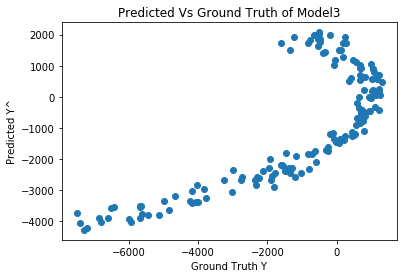

The plot of predicted vs ground truth clearly shows that the model is not a best fit for the given data.


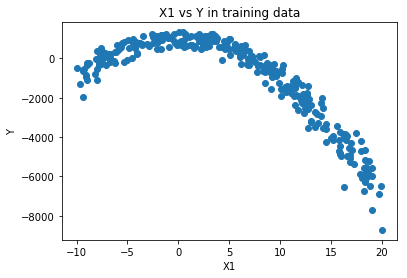

The plot of X1 vs Y shows that a linear model wont be a best fit for the given data, but a higher order model would be needed. A better model is designed with x1, x1^2, x2 as features.
##########################################################################################
Better model : y = 118.404 + 0.934 x1 + -20.313 x1^2 + 2.647 X2
RMSE of this better model on test data : 385.68
R^2 score of this better model on test data : 0.97


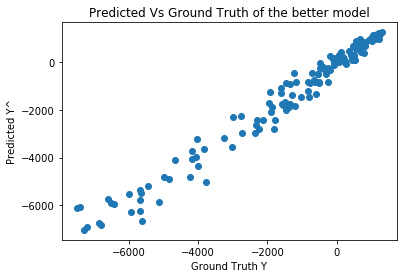

In [5]:
# Bonus

# Show a graph between the predicted Y^ and the Ground truth Y
plt.figure()
plt.scatter(test_data_target, test_result)
plt.xlabel("Ground Truth Y")
plt.ylabel("Predicted Y^")
plt.title("Predicted Vs Ground Truth of Model3")
plt.show()
print('The plot of predicted vs ground truth clearly shows that the model is not a best fit for the given data.')

# Try to plot Y vs X_1 in train set.
plt.figure()
plt.scatter(train_data[:,[1]], y)
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("X1 vs Y in training data")
plt.show()
print('The plot of X1 vs Y shows that a linear model wont be a best fit for the given data, but a higher order model would be needed. A better model is designed with x1, x1^2, x2 as features.')

# can it help you improve your model?
# construct the better model.
## BETTER MODEL
t1 = train_data[:,[1]]
t2 = train_data[:,[2]]

py_x = np.concatenate((t1, np.power(t1,2), t2), axis = 1) #  x1, x1^2, x2 are used as features
new_beta = linear_regress(py_x,y)
print('##########################################################################################')
print('Better model : y = %.3f + %.3f x1 + %.3f x1^2 + %.3f X2'%(new_beta[0][0],new_beta[1][0],new_beta[2][0],new_beta[3][0]))

tt1 = test_data_input[:,[0]]
tt2 = test_data_input[:,[1]]
py_test = np.concatenate((tt1, np.power(tt1,2), tt2), axis = 1)
test_result2 = estimate_target(py_test,new_beta)

test2_rmse = calculate_rmse(test_data_target,test_result2)
print('RMSE of this better model on test data : %.2f'%test2_rmse)
test2_r2 = calculate_R2(test_data_target,test_result2)
print('R^2 score of this better model on test data : %.2f'%test2_r2)

plt.figure()
plt.scatter(test_data_target, test_result2)
plt.xlabel("Ground Truth Y")
plt.ylabel("Predicted Y^")
plt.title("Predicted Vs Ground Truth of the better model")
plt.show()

# Logistic Regression

Generaly, Logistic Regression is used to predict categorial variables. For the simple problem of 2-way classification, the output $\hat{y_i}$ is modeled as the probability that $\{X_i\}$ belongs to class $1$ (given two classes $0$, and $1$).

$$ P( \{X_i\} \in Set_1 ) = \hat{y_i}, $$ ( $y_i$ is the actual label; $y_i \in \{ 0,1 \}$ )


$\hat{y_i}$ is typically modeled as the output of a sigmoid on a linear combination of the input feature $\{X_i\}$:

$$ \mathbf {\hat{y}} = \sigma(X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}) = \sigma_\beta(X)$$

Now, The likelihood of some given data for this model can be written as:

$${\displaystyle {\begin{aligned}L(\beta |x)&=Pr(Y|X;\beta )\\&=\prod _{i}Pr(y_{i}|x_{i};\beta )\\&=\prod _{i}\sigma_{\beta }(x_{i})^{y_{i}}(1-\sigma_{\beta }(x_{i}))^{(1-y_{i})}\end{aligned}}}$$

Unlike in the case of Linear regression, this equation has no closed form solution. Hence we will use gradient descent on the negative log-likelihood $J(\beta)$ to find the optimal $\beta$

$$
J(\beta) = \sum_i{\big( y_ilog(\hat{y_i})+ (1-y_i)log(1-\hat{y_i}) \big) }
$$

with the update equation:

$$
\beta_j = \beta_j + \alpha \times \frac{ \partial J(\beta)}{\partial \beta}
$$

## Question 2

a) You will write the code to find the optimal logistic regression model for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. For the rate of learning $\alpha$ use a linearly decaying policy, or step-wise reduction policy. 

$$ {\displaystyle \mathbf {y} =\sigma \big( {\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }}} \big) $$

b) Explore possible methods of adjusting the learning rate $\alpha$ 

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Load the train dataset 
train_data = np.load('utils/assign_1_data_2_train.npy')

def normalize_data(data, smean, sstd):
    N = data.shape[0]
    sample_mean1 = np.repeat(smean,N, axis = 0)
    sample_std1 = np.repeat(sstd,N, axis = 0)
    data_rem_mean = data - sample_mean1
    norm_data = np.divide(data_rem_mean, sample_std1)
    return norm_data

N = train_data.shape[0]
y = (train_data[:,0]).reshape(N,1)
data1 = train_data[:,[1,2]]
tr_sample_mean = np.mean(data1,axis = 0).reshape((1,2))
tr_sample_std = np.std(data1,axis =0).reshape(1,2)
data = normalize_data(data1, tr_sample_mean, tr_sample_std)
beta_initial = np.array([0.33, 0.33, 0.33])

In [7]:
def calculate_sigma(x):
    result = 1 / (1+ math.exp(-x))
    return result

def estimate_class(x, beta):
    temp = (beta[0,0]*x[0]) + (beta[0,1]*x[1]) + beta[0,2]
    op = calculate_sigma(temp)
    if op >= 0.5:
        est_class = 1
    else:
        est_class = 0
    return est_class

def calculate_accuracy(ground_truth, classifier_rslt):
    accuracy = np.sum(ground_truth==classifier_rslt) / ground_truth.shape[0]
    return accuracy

def calculate_loss(ground_truth, test_data, beta):
    loss = 0
    for i in range(0, ground_truth.shape[0]):
        x = test_data[i,:]
        temp = (beta[0,0]*x[0]) + (beta[0,1]*x[1]) + beta[0,2]
        op = calculate_sigma(temp)
        loss = loss + (ground_truth[i]*np.log(op) + ((1 - ground_truth[i])*np.log(1-op)))
    loss = -loss
    return loss

def testing(test_data, beta):
    rslt = np.zeros((test_data.shape[0],1))
    for i in range(0, test_data.shape[0]):
        xi = test_data[i,:]
        rslt[i] = estimate_class(xi, beta)
    return rslt

In [8]:
# now write the code to find the parameters of the optimization.
def logistic_regress_validation(data, alpha0,initial_params,max_iter,learning = 'fixed'):
    beta_new = initial_params
    loss_val = np.zeros((max_iter,1))
    loss_tr = np.zeros((max_iter,1))
    alpha = alpha0
    for j in range(0,max_iter):
        if learning == 'linear':
            alpha = alpha0/(j+1)
        if learning == 'stepwise':
            if j%50 ==0:
                alpha = alpha/10
        diff = np.zeros((initial_params.shape[0],1))
        for i in range(0,num_train):
            xi = X_tr[i,:].transpose().reshape(initial_params.shape[0],1)
            beta_xi = np.matmul(beta_new,xi)
            yi_hat = calculate_sigma(beta_xi)
            temp = [(y_tr[i] - yi_hat)*t for t in xi]
            diff = diff + temp
        beta_new = beta_new + (alpha*diff.transpose())
        loss_val[j] = (calculate_loss(y_val, X_val, beta_new))/(N - num_train)
        loss_tr[j] = (calculate_loss(y_tr, X_tr, beta_new))/num_train
        if j % 100 == 0:
            print("Iteration %d Training Loss : %.5f Validation Loss : %.5f" %(j,loss_tr[j], loss_val[j]))
    print('##### MAX NUMBER OF ITERATIONS REACHED, OVERFITTING DOES NOT OCCUR ####')
    return j+1, loss_tr[0:j+1], loss_val[0:j+1]

def logistic_regress_training(data,alpha0,initial_params,max_iter, learning = 'fixed'):
    alpha = alpha0
    beta_new = initial_params
    for j in range(0,max_iter):
        if learning == 'linear':
            alpha = alpha0/(j+1)
        if learning == 'stepwise':
            if j%50 ==0:
                alpha = alpha/10
        diff = np.zeros((initial_params.shape[0],1))
        for i in range(0,N):
            xi = data[i,:].transpose().reshape(initial_params.shape[0],1)
            beta_xi = np.matmul(beta_new,xi)
            yi_hat = calculate_sigma(beta_xi)
            temp = [(y[i] - yi_hat)*t for t in xi]
            diff = diff + temp
        beta_new = beta_new + (alpha*diff.transpose())
    return beta_new

Iteration 0 Training Loss : 0.36877 Validation Loss : 0.38443
Iteration 100 Training Loss : 0.24006 Validation Loss : 0.24717
Iteration 200 Training Loss : 0.23216 Validation Loss : 0.23840
Iteration 300 Training Loss : 0.22808 Validation Loss : 0.23384
Iteration 400 Training Loss : 0.22539 Validation Loss : 0.23083
Iteration 500 Training Loss : 0.22341 Validation Loss : 0.22861
Iteration 600 Training Loss : 0.22187 Validation Loss : 0.22687
Iteration 700 Training Loss : 0.22060 Validation Loss : 0.22544
Iteration 800 Training Loss : 0.21953 Validation Loss : 0.22424
Iteration 900 Training Loss : 0.21861 Validation Loss : 0.22320
##### MAX NUMBER OF ITERATIONS REACHED, OVERFITTING DOES NOT OCCUR ####


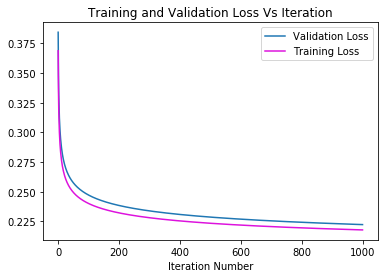

In [10]:
# test on a validation part every 't' iterations to find when you start overfitting.
# t = ?
X = np.concatenate((data, np.ones((N,1))), axis = 1)
# Split training data into two parts 80% for training, 20% for testing
np.random.seed(0);
indices = np.random.permutation(N)

num_train = int(N*0.8)
X_tr = X[indices[0:num_train],:]
X_val = X[indices[num_train:N],:]
y_tr = y[indices[0:num_train]]
y_val = y[indices[num_train:N]]
   
train_iter , loss_tr, loss_val = logistic_regress_validation(X, 0.01, beta_initial, 1000, learning = 'linear')

plt.figure()
plt.plot(np.arange(train_iter),loss_val[0:train_iter])
plt.plot(np.arange(train_iter),loss_tr[0:train_iter],color='#dd12dd')
plt.legend(["Validation Loss","Training Loss"])
plt.title("Training and Validation Loss Vs Iteration")
plt.xlabel("Iteration Number")
plt.show()

# Now for 't' iterations train on the entire dataset for testing on the test_data
beta_new = logistic_regress_training(X, 0.01, beta_initial, train_iter,'linear')

In [11]:
# find the accuracy on the test set:
test_data = np.load('utils/assign_1_data_2_test.npy')
t_data = normalize_data(test_data[:,[1,2]], tr_sample_mean, tr_sample_std)
classifier_rslt = testing(t_data,beta_new)
test_accuracy = calculate_accuracy(test_data[:,0].reshape(150,1), classifier_rslt)
print("Classification Accuracy : %.2f %%" %(test_accuracy*100))

Classification Accuracy : 90.67 %


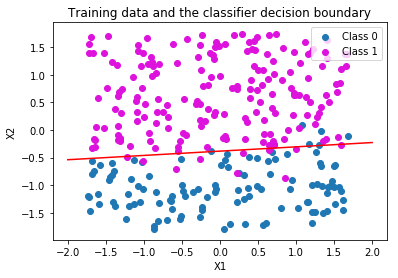

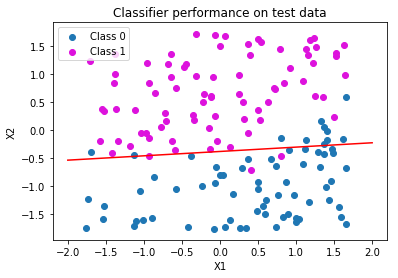

In [12]:
data0 = data[np.where(y == 0)[0],:]
data1 = data[np.where(y == 1)[0],:]

plt.figure()
plt.scatter(data0[:,0], data0[:,1])
plt.scatter(data1[:,0], data1[:,1],color='#dd12dd')
plt.legend(["Class 0","Class 1"])
xx1 = np.array([-2,2])
xx2 = -(beta_new[0,0]*xx1+beta_new[0,2])/beta_new[0,1]
plt.plot(xx1,xx2,color='r')
plt.title("Training data and the classifier decision boundary")
plt.xlabel("X1")
plt.ylabel("X2")

plt.figure(3)
data0t = t_data[np.where(test_data[:,0] == 0)[0],:]
data1t = t_data[np.where(test_data[:,0] == 1)[0],:]
plt.scatter(data0t[:,0], data0t[:,1])
plt.scatter(data1t[:,0], data1t[:,1],color='#dd12dd')
plt.legend(["Class 0","Class 1"])
plt.plot(xx1,xx2,color='r')
plt.title("Classifier performance on test data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [13]:
# Bonus
# Can you adjust the learning rate alpha in a better way?
beta_linear = logistic_regress_training(X, 0.01, beta_initial, train_iter,'linear')
classifier_rslt = testing(t_data,beta_linear)
test_accuracy = calculate_accuracy(test_data[:,0].reshape(150,1), classifier_rslt)
print("Classification Accuracy (Linear decaying learning rate during training) : %.2f %%" %(test_accuracy*100))

beta_stepwise = logistic_regress_training(X, 0.01, beta_initial, train_iter,'stepwise')
classifier_rslt = testing(t_data,beta_stepwise)
test_accuracy = calculate_accuracy(test_data[:,0].reshape(150,1), classifier_rslt)
print("Classification Accuracy (Stepwise decaying learning rate during training) : %.2f %%" %(test_accuracy*100))

beta_fixed = logistic_regress_training(X, 0.0001, beta_initial, train_iter)
classifier_rslt = testing(t_data,beta_fixed)
test_accuracy = calculate_accuracy(test_data[:,0].reshape(150,1), classifier_rslt)
print("Classification Accuracy (Fixed learning rate during training) : %.2f %%" %(test_accuracy*100))

Classification Accuracy (Linear decaying learning rate during training) : 90.67 %
Classification Accuracy (Stepwise decaying learning rate during training) : 91.33 %
Classification Accuracy (Fixed learning rate during training) : 91.33 %


# EM algorithm

This is a general framework for likelihood-based parameter estimation.
A basic outline of this algorithm is:

* start with initial guesses of parameters

* E step: estimate memberships given params

* M step: estimate params given memberships

* Repeat until convergence

** Refer to [this link](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf) (9.2.2) .**


## Question 3

Let ${\displaystyle \mathbf {x} =(\mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{n})} $ be a sample of $n$ independent observations from a mixture of two multivariate normal distributions of dimension $d$ , and let ${\displaystyle \mathbf {z} =(z_{1},z_{2},\ldots ,z_{n})} $ be the latent variables that determine the component from which the observation originates.

$X_i |(Z_i = 1) \sim \mathcal{N}_d(\boldsymbol{\mu}_1,\Sigma_1)$ and $X_i |(Z_i = 2) \sim \mathcal{N}_d(\boldsymbol{\mu}_2,\Sigma_2)$

The aim is to estimate the unknown parameters representing the mixing value between the Gaussians and the means and covariances of each:

$$ \theta = \big( \boldsymbol{\tau},\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\Sigma_1,\Sigma_2 \big) $$

a) Given the data, find the parameters $\theta$ using EM algorithm.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stat
from numpy import linalg as la
from matplotlib.patches import Ellipse

# Load the train dataset 
data = np.load('utils/assign_1_data_3.npy')
[N, D] = data.shape
# The data is a 1000*2 numpy array, where each row is a independent observation, and 
# the columns are measurement in dimension x and y respectively. 

In [15]:
def compute_likelyhood(x, weights, mu, covar):
    ll = 0
    [N, D] = x.shape
    for i in range(0,N):
        temp = 0
        xi = x[i,:].reshape(1,D)
        for k in range(0,D):
            temp = temp + (weights[k]*stat.multivariate_normal.pdf(xi,mean = mu[:,k], cov = covar[:,:,k]))
        ll = ll + np.log(temp)
    return ll

def kMeansClustering(data, K):
    D,N = data.shape
    sample_mean=data.mean(1).reshape(D,1)
    np.random.seed(0);
    centres = np.repeat(sample_mean,K, axis = 1) + (10*np.random.rand(D,K))
    label = np.zeros((N,1))

    for iter_num in range(50):
        for i in range(N):
            datapoint = data[:,i].reshape(D,1)
            xi = np.repeat(datapoint,K, axis = 1)
            dist_i = xi - centres
            dist_2norm_i = la.norm(dist_i, axis = 0)
            label[i] = np.argmin(dist_2norm_i)
        
        # Recompute the means
        new_centres = np.zeros(centres.shape)
        for i in range(K):
            data_i = data[:,np.where(label == i)[0]]
            new_centres[:,i] = data_i.mean(axis=1)
            
        tolerance = la.norm(new_centres - centres)
        centres = new_centres
        if tolerance<0.001:
            break
    return centres.transpose(), label


## Initialize 2 Gaussians
def KMeansInitialization(data,K):
    N,D = np.shape(data)
    c, l = kMeansClustering(data.transpose(),K)
    mu = c.transpose()
    covar = np.array(np.zeros((D,D,K),dtype=np.float64))
    p = np.array(np.zeros((K),dtype=np.float64))
    
    for k in range(K):
        x = data[np.where(l==k)[0]]
        x = np.transpose(x)
        rows,cols = x.shape
        covar[:,:,k] = np.cov(x)
        p[k] = float(cols)/N
    return mu, covar, p

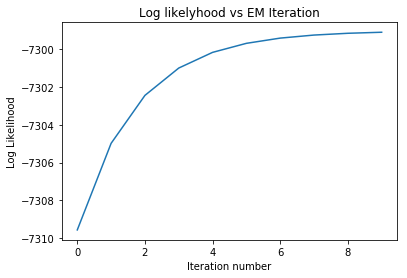

In [16]:
# now write the code to find the parameter theta.

initial_mu, initial_cov, initial_weights = KMeansInitialization(data,2)

## EM Algorithm
# E step : estimate memberships given params
membership_nk = np.zeros((N,D))
mu = initial_mu
covar = initial_cov
weights = initial_weights

num_iter = 10
ll = np.zeros((num_iter,1))
for em_iter in range(0,num_iter):
    for k in range(0,D):
        covar_k = covar[:,:,k]
        mu_k = mu[:,k]
        w_k = weights[k]
        for i in range(0,N):
            xi = data[i,:].reshape(1,D)
            membership_nk[i,k] = w_k * stat.multivariate_normal.pdf(xi,mean = mu_k, cov = covar_k)
    sum_res = np.sum(membership_nk, axis = 1).reshape(N,1)
    sum_res1 = np.repeat(sum_res, D, axis = 1)
    membership = np.divide(membership_nk,sum_res1)
    
    # M step : estimate params given memberships
    # weights
    Nk = np.sum(membership, axis = 0)
    weights_new = (Nk/N).reshape(D,1)
    mu_new = np.zeros((D,D))
    covar_new = np.zeros((D,D,D))
    # means
    for k in range(0,D):
        for i in range(0,N):
            xi = data[i,:].reshape(D,1)
            mu_new[:,k] = mu_new[:,k] + (membership[i,k]*xi).reshape(-1)
    mu_new = np.divide(mu_new,np.repeat(Nk.reshape(1,D), D, axis = 0))
    # covariance
    for k in range(0,D):
        mu_k = mu_new[:,k].reshape(D,1)
        for i in range(0,N):
            xi = data[i,:].reshape(D,1)
            d = xi - mu_k
            covar_new[:,:,k] = covar_new[:,:,k] + (membership[i,k]*(d*d.transpose()))
        covar_new[:,:,k] = np.divide(covar_new[:,:,k],Nk[k]*np.ones((D,D)))
    
    mu = mu_new
    covar = covar_new
    weights = weights_new
    ll[em_iter] = compute_likelyhood(data, weights, mu, covar)

plt.figure()
plt.plot(np.arange(0,num_iter),ll)
plt.xlabel("Iteration number")
plt.ylabel("Log Likelihood")
plt.title("Log likelyhood vs EM Iteration")
plt.show()

In [17]:
# Parameters are given by:
print('Estimated Means')
print(mu)
print('Estimated Covariance')
print(covar)
print('Estimated weights of Gaussians')
print(weights)

Estimated Means
[[ 49.90102154  60.45681096]
 [ 75.58584599  55.32732218]]
Estimated Covariance
[[[ 20.11832479  92.57362023]
  [  2.22626151  51.67313519]]

 [[  2.22626151  51.67313519]
  [ 89.60578867  58.35908088]]]
Estimated weights of Gaussians
[[ 0.49605868]
 [ 0.50394132]]


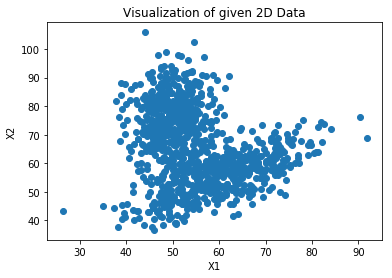

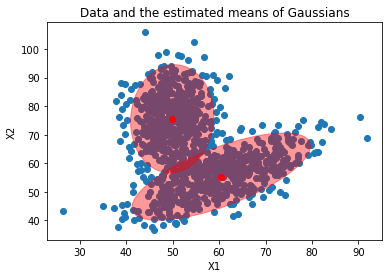

In [18]:
# Visualize the entire data by plotting them as points in a 2-D canvas.  
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualization of given 2D Data")
# Show the estimated means and the standard deviations.
def plot_ellipse(ax, mu, sigma, color="r"):
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 4 * np.sqrt(vals)
    ellipse = Ellipse(mu, w, h, theta, color=color)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.4)
    ax.add_artist(ellipse)

plt.figure()
fig,a1 = plt.subplots()
plt.scatter(data[:,0], data[:,1])
plt.scatter(mu[0,:],mu[1,:],color = 'r')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data and the estimated means of Gaussians")
plot_ellipse(a1,mu_new[:,0],covar_new[:,:,0])
plot_ellipse(a1,mu_new[:,1],covar_new[:,:,1])
plt.show()

# Clustering

For clustering we covered two algorithms

1) K-means : An iterative method to get 'K' clusters, initializing them randomly

2) Hirarchical : An iterative method to get a dendogram of clustering with various numbers of cluster centers.

### K-means Clustering

We initialize $K$ cluster centers $\{ c_1,c_2 ,... c_k\}$for $K$-clusters randomly. All the data points are assigned a cluster index $D_i \in \{ 1,2,...,k\}$, based on the closest cluster center to each point.

Now, for each cluster, the cluster centers are re-evaluated as the mean of all the points in the center.

$$
c_i = mean(\{ X_j | D_j = i \})
$$
This process continues till convergence.


## Question 4

The dataset contains 1000  color images.Convert them to grayscale images. We need to cluster them into various $n$ clusters based on the similarity of their histograms. For each image, find the histogram with bin size 25 (last bin of 30;i.e.225-255;giving you 10 bins). Now treating each of these bins as seperate dimensions, find:

a) Cluster Centers for $n = 5$ clusters, with $L_2$ distance criteria for measuring distance between a pair of images.

b) **Bonus**: Use Earth Movers Distance in the above problem.

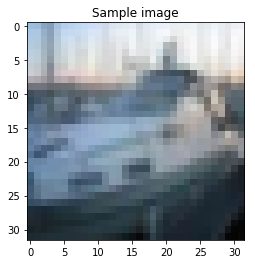

In [19]:
# For this problem we will be using the 1000 test images of CIFAR-10 dataset.
## Load the data from the following link
# https://www.cs.toronto.edu/~kriz/cifar.html
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def convert_rgb2gray(img_rgb):
    return (0.299*img_rgb[:,:,0])+(0.587*img_rgb[:,:,1])+(0.114*img_rgb[:,:,2])

def load_images():
    dataset_file = 'utils/test_batch'
    xx = unpickle(dataset_file)
    data1 = xx[b'data']
    label = xx[b'labels']
    N = 1000
    data = data1[0:N,:]
    test_data = data.reshape(N,3,32,32).transpose(0,2,3,1)
    return test_data, label[0:N]


test_data, grnd_truth = load_images()
plt.figure(1)
plt.imshow(test_data[2,:,:,:])
plt.title('Sample image')
plt.show()

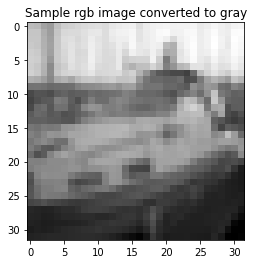

In [20]:
# Convert it to grayscale values
tt = convert_rgb2gray(test_data[2,:,:,:])
tt2 = np.asarray(tt,dtype="uint8")
plt.figure(2)
plt.imshow(tt2,cmap='gray')
plt.title('Sample rgb image converted to gray')
plt.show()

In [21]:
# find the histograms and get a 10-dimensional representation of each images.
def extract_hist_features(images):
    N = images.shape[0]
    hist_feature_vec = np.zeros([N,10])
    for i in range(N):
        ct_img = images[i,:,:,:]
        ct_img_gray = convert_rgb2gray(ct_img)
        ct_img_gray = np.asarray(ct_img_gray,dtype="uint8")
        hist_feature_vec[i,:] = np.histogram(ct_img_gray,bins=[0,25,50,75,100,125,150,175,200,225,255])[0].reshape(1,10)
    return hist_feature_vec.transpose()

hist_feature_vec = extract_hist_features(test_data)

In [22]:
# Use K-means to find  out the number of cluster centers.
def kMeansClustering(data, K):
    D,N = data.shape
    sample_mean=data.mean(1).reshape(D,1)
    np.random.seed(0);
    centres = np.repeat(sample_mean,K, axis = 1) + (10*np.random.rand(D,K))
    label = np.zeros((N,1))

    for iter_num in range(50):
        for i in range(N):
            datapoint = data[:,i].reshape(D,1)
            xi = np.repeat(datapoint,K, axis = 1)
            dist_i = xi - centres
            dist_2norm_i = la.norm(dist_i, axis = 0)
            label[i] = np.argmin(dist_2norm_i)
        
        # Recompute the means
        new_centres = np.zeros(centres.shape)
        for i in range(K):
            data_i = data[:,np.where(label == i)[0]]
            new_centres[:,i] = data_i.mean(axis=1)
            
        tolerance = la.norm(new_centres - centres)
        centres = new_centres
        if tolerance<0.001:
            break
    return centres, label


K = 5 # number of clusters
centres, label = kMeansClustering(hist_feature_vec,K)
Nk = np.histogram(label, bins = K)[0].reshape(K,1)
centres1 = np.asarray(centres, dtype = "uint8")

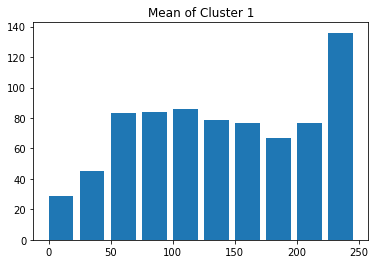

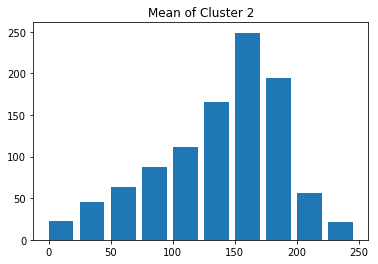

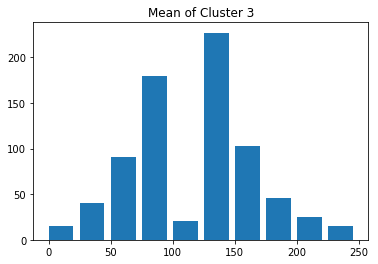

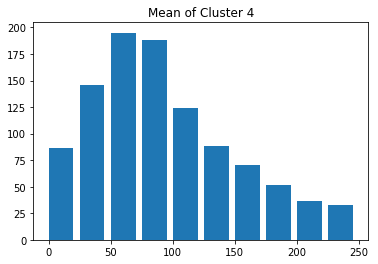

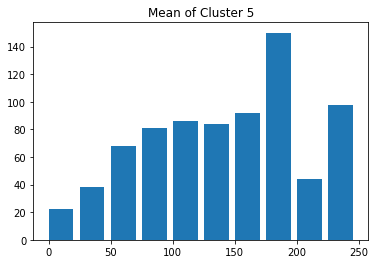

In [23]:
# Visualize cluster means to see what they look like.
for i in range(K):
    plt.figure()
    plt.bar([10,35,60,85,110,135,160,185,210,235], centres1[:,i], 20)
    plt.title('Mean of Cluster %d'%(i+1))
plt.show()

# References

Useful references will be added shortly.